# Estudo de Machine Learning
Feito por: Kenzo Inanami de Faria

# Dataset

O dataset escolhido para praticar foi o "Credit score classification" encontrado em https://www.kaggle.com/datasets/parisrohan/credit-score-classification. Ele contem informações pessoais e financeiras de 12500 pessoas, e foi criado com a finalidade de classificar o _credit score_ delas em "Good", "Standard" ou "Poor", bom, regular ou ruim, respectivamente.

Os dados vem divididos em arquivos separados para treino e para teste.

In [ ]:
import seaborn as sns
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
data = pd.read_csv('train.csv')

<ipython-input-161-c2b855ec3be6>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('train.csv')


In [ ]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


# Pré-processamento

Foram removidas as colunas referentes a atributos que não contribuem para o processo de classificação.

In [ ]:
data = data.drop(columns=['ID','Name','SSN'])
data.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23,Scientist,19114.12,1824.843333,3,4,3,4,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,CUS_0xd40,February,23,Scientist,19114.12,NaN,3,4,3,4,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,CUS_0xd40,March,-500,Scientist,19114.12,NaN,3,4,3,4,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,CUS_0xd40,April,23,Scientist,19114.12,NaN,3,4,3,4,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,CUS_0xd40,May,23,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


As colunas a seguir que representam dados numéricos serão padronizadas para float. Algumas das colunas contém dados que são
números misturados com underscores por algum motivo, e para realizar a conversão os underscores tiveram que ser removidos.

In [ ]:
columns_to_numeric = ['Age','Annual_Income','Num_of_Loan','Outstanding_Debt','Changed_Credit_Limit',
                      'Monthly_Balance','Amount_invested_monthly','Num_of_Delayed_Payment']

for i in columns_to_numeric:
  data[i]=data[i].str.replace("_","")
  try:
    data[i]=data[i].astype("float")
    data[i]=data[i].astype("float")
  except:
    continue

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Age                       100000 non-null  float64
 3   Occupation                100000 non-null  object 
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     84998 non-null   float64
 6   Num_Bank_Accounts         100000 non-null  int64  
 7   Num_Credit_Card           100000 non-null  int64  
 8   Interest_Rate             100000 non-null  int64  
 9   Num_of_Loan               100000 non-null  float64
 10  Type_of_Loan              88592 non-null   object 
 11  Delay_from_due_date       100000 non-null  int64  
 12  Num_of_Delayed_Payment    92998 non-null   float64
 13  Changed_Credit_Limit      100000 non-null  ob

A coluna "Changed Credit Limit" continha dados preenchidos por apenas underscores, e depois da substituição por espaço vazio, foi necessário transformar esse espaço em NaN.

In [ ]:
for i in data[data["Changed_Credit_Limit"]==""].index.tolist():
  data.loc[i,"Changed_Credit_Limit"]=np.nan
data["Changed_Credit_Limit"]=data["Changed_Credit_Limit"].astype("float")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Age                       100000 non-null  float64
 3   Occupation                100000 non-null  object 
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     84998 non-null   float64
 6   Num_Bank_Accounts         100000 non-null  int64  
 7   Num_Credit_Card           100000 non-null  int64  
 8   Interest_Rate             100000 non-null  int64  
 9   Num_of_Loan               100000 non-null  float64
 10  Type_of_Loan              88592 non-null   object 
 11  Delay_from_due_date       100000 non-null  int64  
 12  Num_of_Delayed_Payment    92998 non-null   float64
 13  Changed_Credit_Limit      97909 non-null   fl

In [ ]:
data.dtypes

Customer_ID                  object
Month                        object
Age                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                 object
dtype: object

Os dados anomalos da coluna "Age", ou seja idade, foram transformados para NaN para serem tratados posteriormente.
Foram consideradas anomalas idades menores que 18 e maiores que 110.

In [ ]:
data.loc[(data['Age'] < 18) | (data['Age'] > 110), 'Age'] = np.nan

A coluna "Month" contem meses na forma de string, que foram transformados em inteiros com seus números correspondentes.

In [ ]:
def mounth_to_number(mes):
    mounth = {
        'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
        'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
    }
    return mounth.get(mes, np.nan)

data['Month'] = data['Month'].apply(mounth_to_number)

A coluna "Credit History Age" contém dados que representam um período de tempo em anos e meses mas na forma de string,
então foi transformada para uma forma numérica, nesse caso na quantidade de dias equivalentes.

In [ ]:
def string_to_days(date_str):
    # Extrai os números de anos e meses da string
    days = np.nan
    if not isinstance(date_str, float):
      parts = date_str.split(' ')
      years = int(parts[0])
      mounths = int(parts[3])

      # Converte anos para dias e adiciona os dias dos meses
      days = (years * 365) + (mounths * 30)
    return days
data['Credit_History_Age'] = data['Credit_History_Age'].apply(string_to_days)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  int64  
 2   Age                       91520 non-null   float64
 3   Occupation                100000 non-null  object 
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     84998 non-null   float64
 6   Num_Bank_Accounts         100000 non-null  int64  
 7   Num_Credit_Card           100000 non-null  int64  
 8   Interest_Rate             100000 non-null  int64  
 9   Num_of_Loan               100000 non-null  float64
 10  Type_of_Loan              88592 non-null   object 
 11  Delay_from_due_date       100000 non-null  int64  
 12  Num_of_Delayed_Payment    92998 non-null   float64
 13  Changed_Credit_Limit      97909 non-null   fl

In [ ]:
data.describe()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,91520.00000,1.000000e+05,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,92998.000000,97909.000000,98035.000000,100000.000000,100000.000000,90970.000000,100000.000000,95521.000000,9.713200e+04
mean,4.500000,34.43137,1.764157e+05,4194.170850,17.091280,22.47443,72.466040,3.009960,21.068780,30.923342,10.389025,27.754251,1426.220376,32.285173,6725.694735,1403.118217,637.412998,-3.088580e+22
std,2.291299,10.12918,1.429618e+06,3183.686167,117.404834,129.05741,466.422621,62.647879,14.860104,226.031892,6.789496,193.177339,1155.129026,5.116875,3033.815719,8306.041270,2043.319327,3.208492e+24
min,1.000000,18.00000,7.005930e+03,303.645417,-1.000000,0.00000,1.000000,-100.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,30.000000,0.000000,0.000000,-3.333333e+26
25%,2.750000,26.00000,1.945750e+04,1625.568229,3.000000,4.00000,8.000000,1.000000,10.000000,9.000000,5.320000,3.000000,566.072500,28.052567,4380.000000,30.306660,74.534002,2.699858e+02
50%,4.500000,34.00000,3.757861e+04,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,1166.155000,32.305784,6660.000000,69.249473,135.925682,3.364493e+02
75%,6.250000,42.00000,7.279092e+04,5957.448333,7.000000,7.00000,20.000000,5.000000,28.000000,18.000000,14.870000,9.000000,1945.962500,36.496663,9185.000000,161.224249,265.731733,4.696405e+02
max,8.000000,109.00000,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,12285.000000,82331.000000,10000.000000,1.602041e+03


Os dados referentes ao número de contas bancárias e o número de empréstimos de cada pessoa não podem ser menores que 0,
portanto, dados assim terão que ser tratados.

In [ ]:
#Numero de contas bancarias e emprestimos não devem ser negativos
for i in ["Num_Bank_Accounts","Num_of_Loan"]:
    data.loc[data[i]<0,i]=np.nan

Depois, busca-se dados anômalos em meio as colunas de atributos categóricos.

In [ ]:
#Buscando atributos categóricos anômalos
for i in data.select_dtypes(include="object").columns.tolist():
    print("********{} value counts********".format(i))
    print(data[i].value_counts())

********Customer_ID value counts********
CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: Customer_ID, Length: 12500, dtype: int64
********Occupation value counts********
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64
********Type_of_Loan value counts********
Not Specified                                                                                                                         1408
Credit-Builder Loan                                                                                                                 

Os anômalos encontrados foram substituidos com "NaN".

In [ ]:
#Tratando valores anômalos como NaN
data['Payment_of_Min_Amount'].replace("NM","No",inplace=True)
data['Payment_Behaviour']= data['Payment_Behaviour'].replace("!@9#%8",np.nan)
data["Occupation"]=data["Occupation"].replace("_______",np.nan)
data["Credit_Mix"]=data["Credit_Mix"].replace("_",np.nan)

A coluna "Type of Loan" especificamente, foi tratada de maneira diferente. A coluna em si foi removida, e os 8 tipos de maior incidência foram transformados em novas colunas com valores binários,
sendo 1 correspondente a verdadeiro e 0 a falso.

Assim, em vez de uma coluna para cada combinação de tipos de empréstimo, a combinação ou não de diferentes empréstimos é indicada por atributos binários.

In [ ]:
#Tratando de type of Loan através de mapeamento através dos 8 tipos que mais aparecem
data["Type_of_Loan"].value_counts()[:20]

Not Specified                               1408
Credit-Builder Loan                         1280
Personal Loan                               1272
Debt Consolidation Loan                     1264
Student Loan                                1240
Payday Loan                                 1200
Mortgage Loan                               1176
Auto Loan                                   1152
Home Equity Loan                            1136
Personal Loan, and Student Loan              320
Not Specified, and Payday Loan               272
Mortgage Loan, and Home Equity Loan          264
Student Loan, and Payday Loan                256
Credit-Builder Loan, and Not Specified       248
Student Loan, and Credit-Builder Loan        248
Payday Loan, and Auto Loan                   240
Payday Loan, and Debt Consolidation Loan     240
Payday Loan, and Student Loan                232
Personal Loan, and Credit-Builder Loan       232
Mortgage Loan, and Not Specified             232
Name: Type_of_Loan, 

In [ ]:
a={True:1, False:0}


for i in data["Type_of_Loan"].value_counts().head(9).index[1:]:
    data[i]=data["Type_of_Loan"].str.contains(i).map(a)

data.drop("Type_of_Loan",axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  int64  
 2   Age                       91520 non-null   float64
 3   Occupation                92938 non-null   object 
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     84998 non-null   float64
 6   Num_Bank_Accounts         99979 non-null   float64
 7   Num_Credit_Card           100000 non-null  int64  
 8   Interest_Rate             100000 non-null  int64  
 9   Num_of_Loan               96124 non-null   float64
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    92998 non-null   float64
 12  Changed_Credit_Limit      97909 non-null   float64
 13  Num_Credit_Inquiries      98035 non-null   fl

Os dados da coluna "Customer_ID" estão em hexadecimal, portanto foram transformados em decimais.

In [ ]:
#ID está em hexadecimal
data['Customer_ID'] = data.Customer_ID.apply(lambda x: int(x[4:], 16))

## Tratamento de Nulos

Os dados nulos já presentes no dataset, assim como os preenchidos no lugar de dados anômalos, foram tratados a seguir. Como é possível observar na matriz de dados faltantes, eles estão bastante espalhados entre as tuplas, impossibilitando a
remoção completa sem impacto no modelo.

<Figure size 1000x800 with 0 Axes>

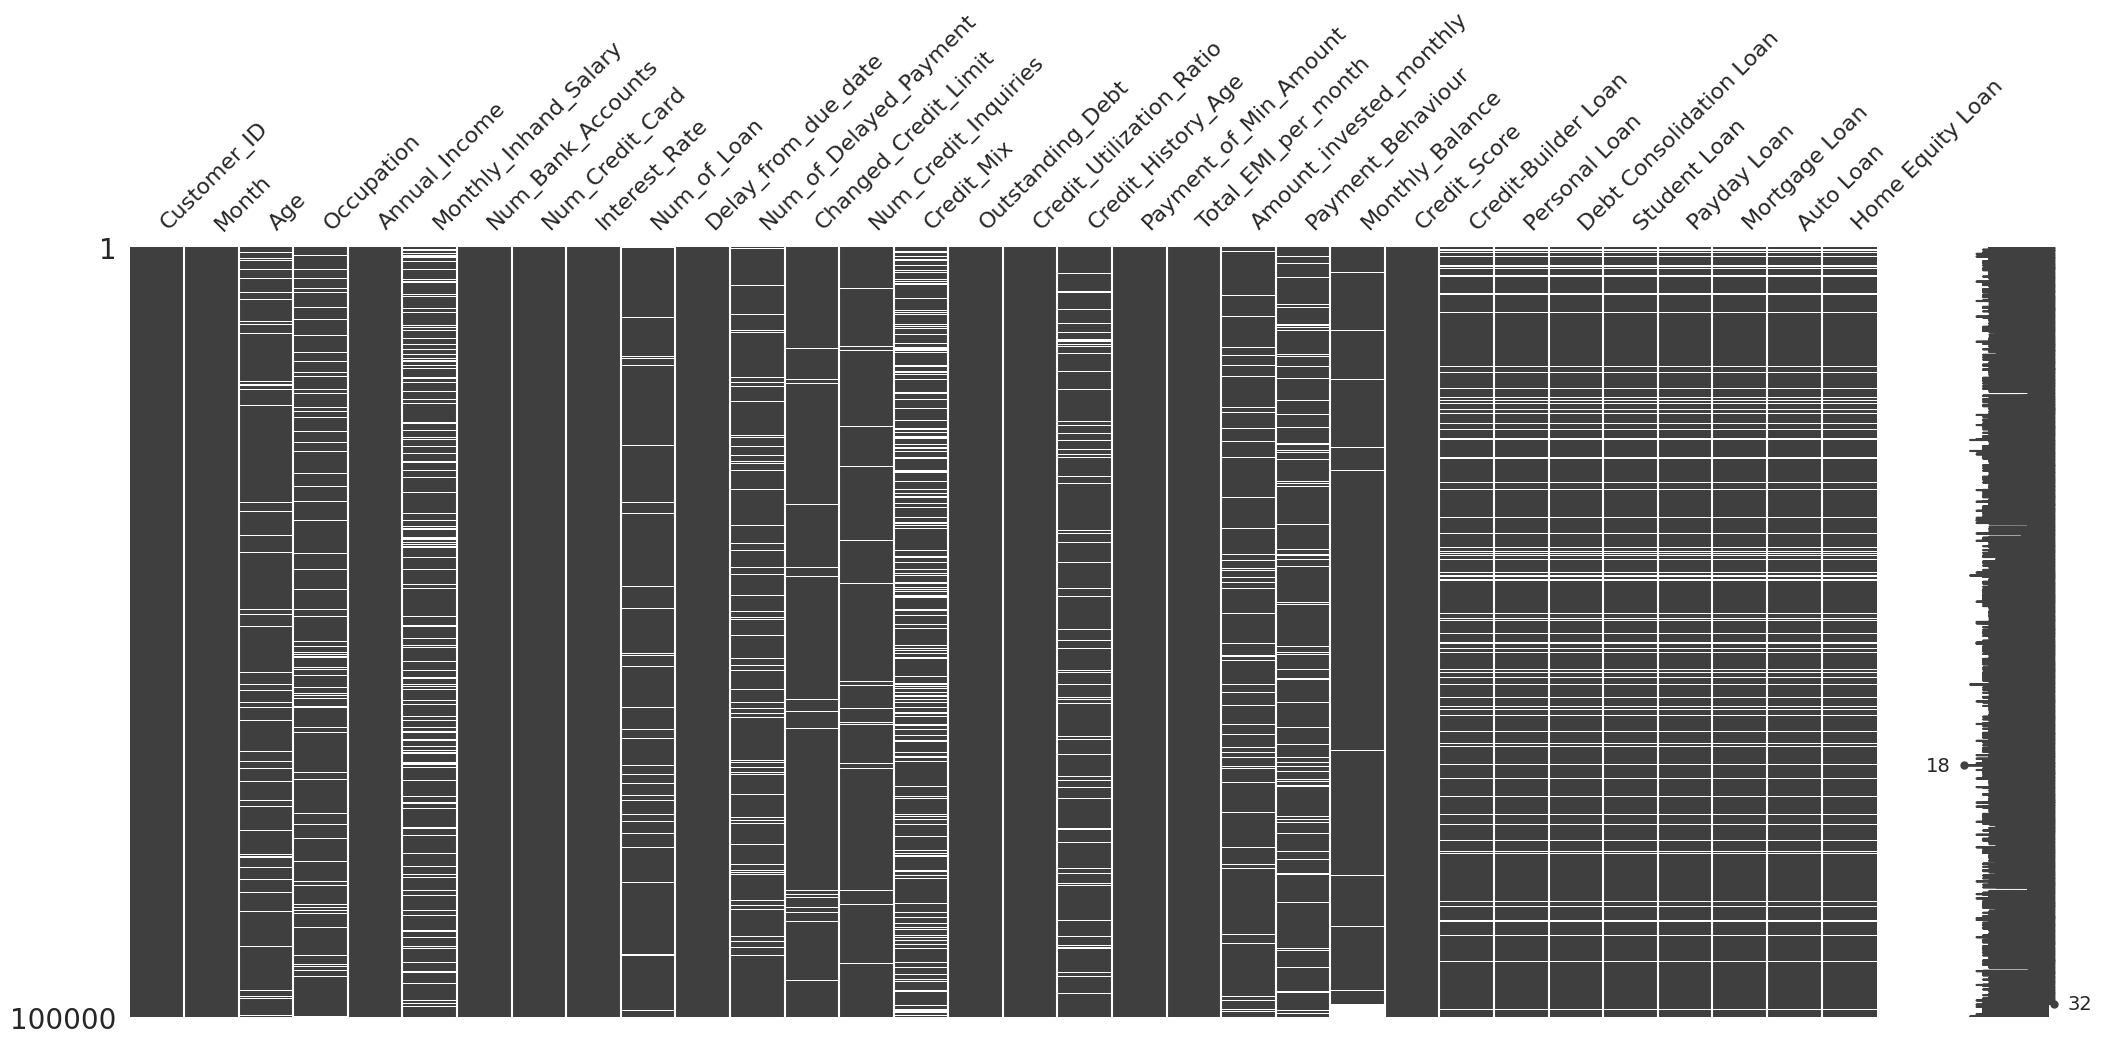

In [ ]:
plt.figure(figsize=(10,8))
msno.matrix(data)
plt.show()

<Figure size 800x600 with 0 Axes>

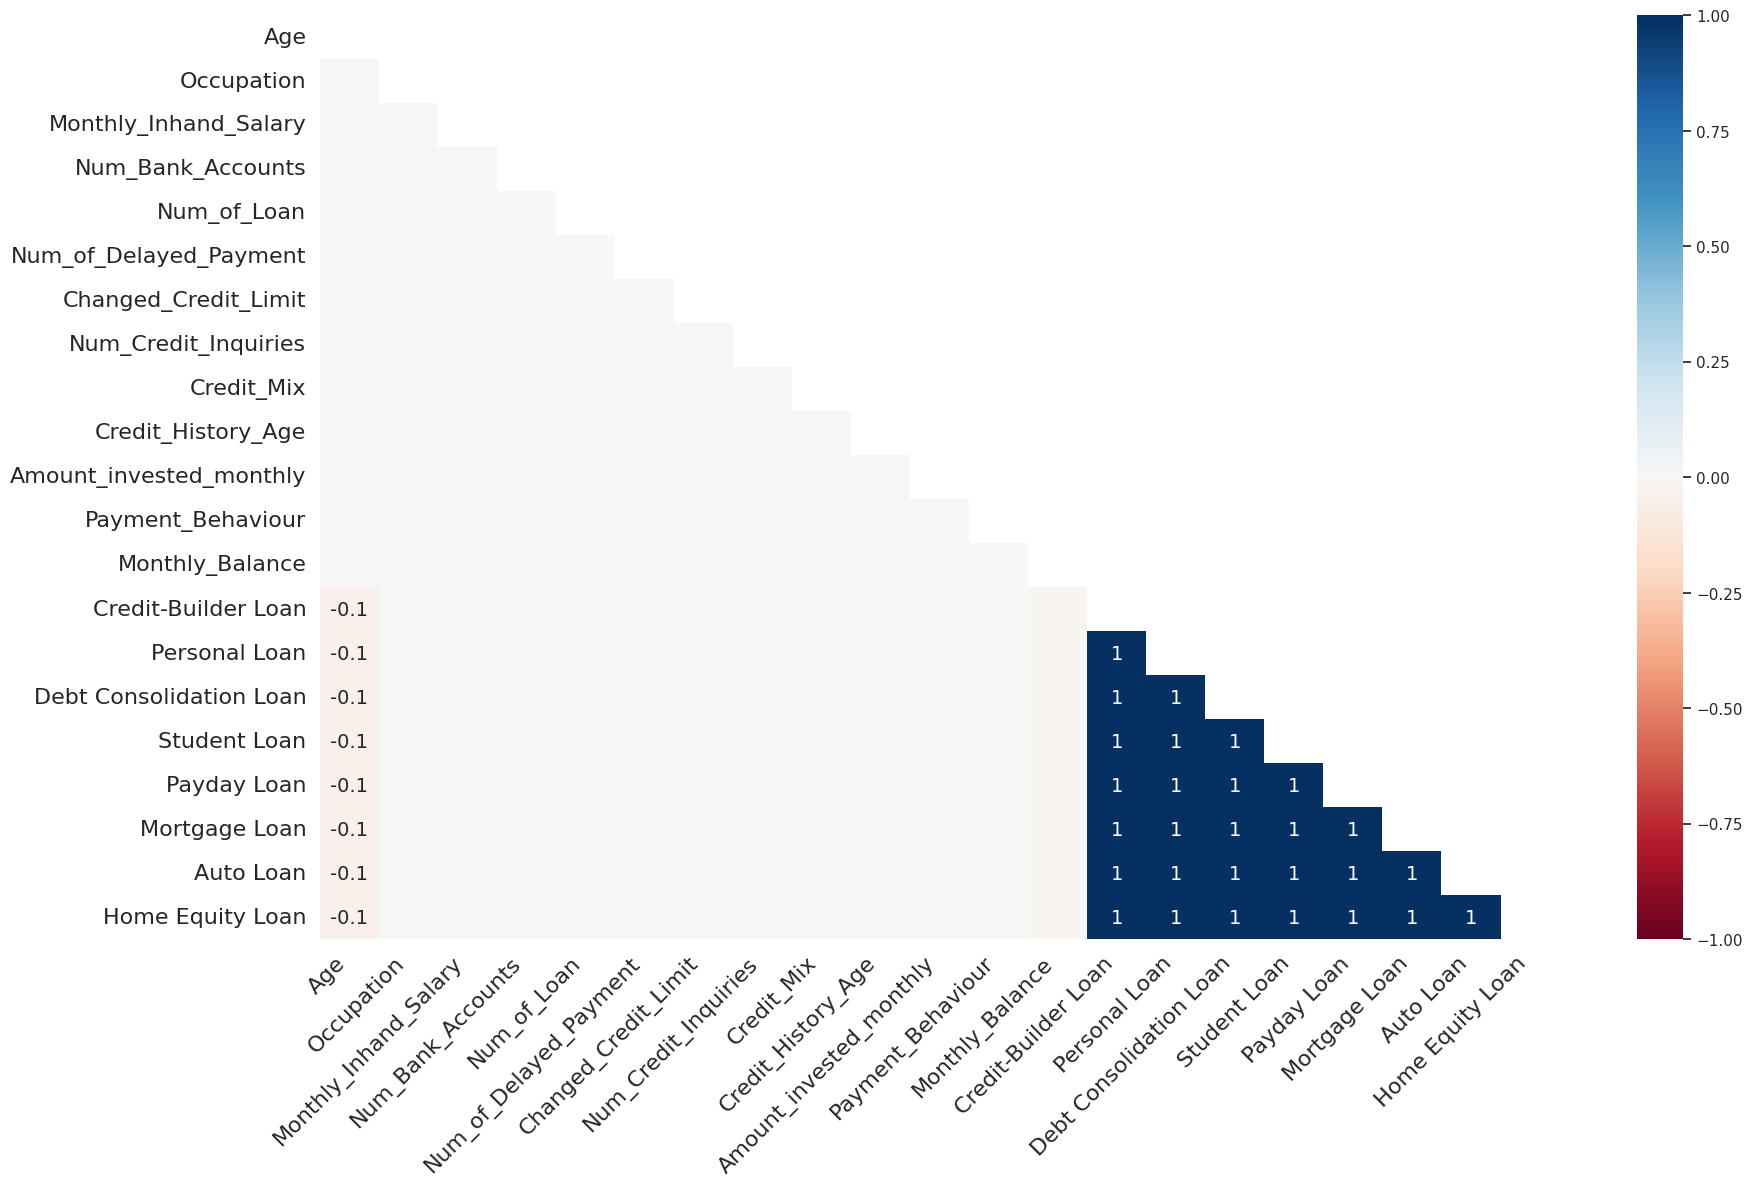

In [ ]:
#Nenhuma correlação entre nulos
plt.figure(figsize=(8,6))
msno.heatmap(data)
plt.show()

Cada cliente possui um Customer ID, cada ID pode ter multiplas entradas na base de dados, o método KNNImputer, no caso os dados nulos nos tipos de empréstimo são preenchidos conforme o vizinho mais próximo.

In [ ]:
#Tipos de Empréstimo serão preenchidos com o método k nearest neighbours
#AVISO: leva uns 8 minutos pra processar
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=1)

for col in data.columns[-8:].tolist():
    imputer.fit(data[["Customer_ID" ,col]])
    data[["Customer_ID", col]] = imputer.transform(data[["Customer_ID", col]])

data.isnull().sum()

Customer_ID                     0
Month                           0
Age                          8480
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts              21
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                  3876
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour            7600
Monthly_Balance              2868
Credit_Score                    0
Credit-Builder Loan             0
Personal Loan                   0
Debt Consolidation Loan         0
Student Loan                    0
Payday Loan                     0
Mortgage Loan 

Os valores categóricos faltantes foram preenchidos com a moda dos valores não nulos cujo Customer_ID é igual ao da tupla com esses faltantes.

In [ ]:
#Preenchendo os valores categoricos faltantes baseados na moda de seus IDs
def preencher_categorico(data, val):
    index_nan=list(data[val][data[val].isnull()].index)
    for i in index_nan:
        val_pred=data[val][data["Customer_ID"]==data.iloc[i]["Customer_ID"]].mode()[0]
        val_mode=data[val].mode()[0]
        if not pd.isna(val_pred):
            data.loc[i, val] = val_pred
        else:
            data.loc[i, val] = val_mode
    return list(data[val])


In [ ]:
data.select_dtypes(include="object").columns

Index(['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour', 'Credit_Score'],
      dtype='object')

In [ ]:
##AVISO: Leva uns 5 minutos pra processar
data["Occupation"]=preencher_categorico(data=data,val="Occupation")
data["Credit_Mix"]=preencher_categorico(data=data,val="Credit_Mix")
data["Payment_Behaviour"]=preencher_categorico(data=data,val="Payment_Behaviour")
data.isnull().sum()

Customer_ID                     0
Month                           0
Age                          8480
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts              21
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                  3876
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              2868
Credit_Score                    0
Credit-Builder Loan             0
Personal Loan                   0
Debt Consolidation Loan         0
Student Loan                    0
Payday Loan                     0
Mortgage Loan 

Os valores numéricos faltantes foram preenchidos com a mediana dos valores não nulos cujo Customer_ID é igual ao da tupla com esses faltantes.

In [ ]:
##Preenchendo Numericos Faltantes utilizando a mediana de cada Customer_ID
def preencher_numerico(data, val):
    index_nan = list(data[val][data[val].isnull()].index)
    for i in index_nan:
        subset = data[val][data["Customer_ID"] == data.iloc[i]["Customer_ID"]]
        if not subset.empty:
            val_pred = subset.median()
        else:
            val_pred = np.nan
        val_median = data[val].median()
        if not pd.isna(val_pred):
            data.loc[i, val] = val_pred
        else:
            data.loc[i, val] = val_median
    return list(data[val])

In [ ]:
data["Age"]=preencher_numerico(data=data,val="Age")
data["Monthly_Inhand_Salary"]=preencher_numerico(data=data,val="Monthly_Inhand_Salary")
data["Num_Bank_Accounts"]=preencher_numerico(data=data,val="Num_Bank_Accounts")
data["Num_of_Loan"]=preencher_numerico(data=data,val="Num_of_Loan")
data["Num_of_Delayed_Payment"]=preencher_numerico(data=data,val="Num_of_Delayed_Payment")
data["Changed_Credit_Limit"]=preencher_numerico(data=data,val="Changed_Credit_Limit")
data["Num_Credit_Inquiries"]=preencher_numerico(data=data,val="Num_Credit_Inquiries")
data["Credit_History_Age"]=preencher_numerico(data=data,val="Credit_History_Age")
data["Amount_invested_monthly"]=preencher_numerico(data=data,val="Amount_invested_monthly")
data["Monthly_Balance"]=preencher_numerico(data=data,val="Monthly_Balance")
data.isnull().sum()

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local

Customer_ID                 0
Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
Credit-Builder Loan         0
Personal Loan               0
Debt Consolidation Loan     0
Student Loan                0
Payday Loan                 0
Mortgage Loan               0
Auto Loan                   0
Home Equity Loan            0
dtype: int64

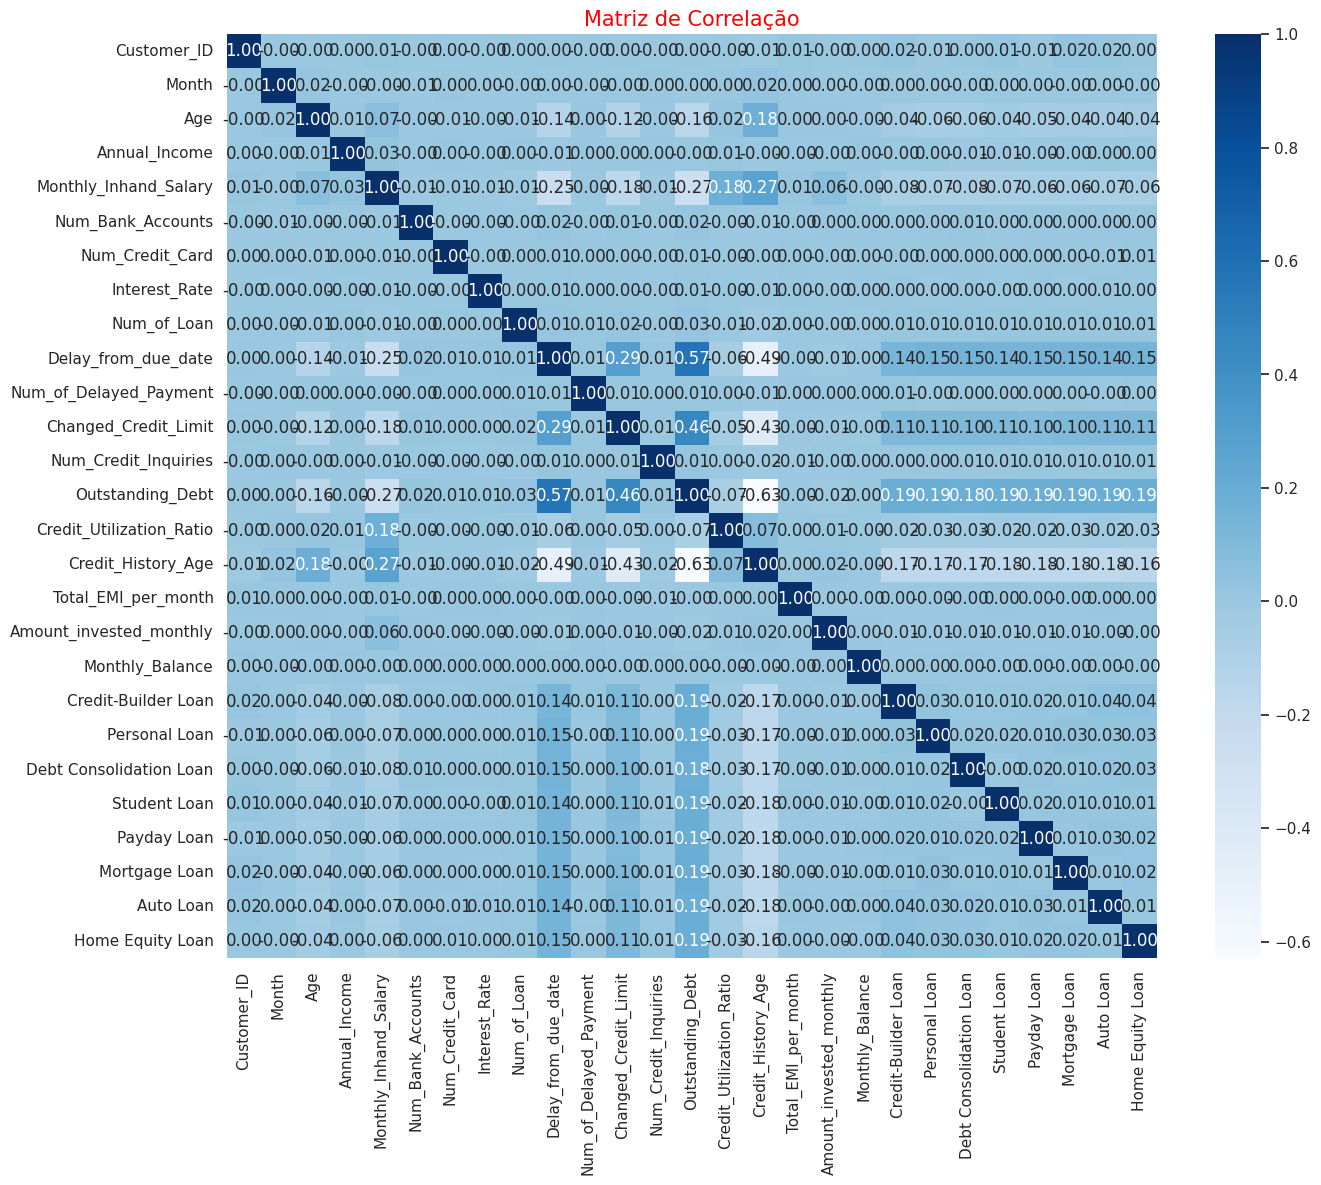

In [ ]:
#Matriz de Correlação
df_corr=data.select_dtypes(include=["float64","int64"]).corr()

plt.figure(figsize=(15,12))
plt.title("Matriz de Correlação", color="red",fontsize=15)
sns.heatmap(df_corr,annot=True,cmap="Blues",fmt=".2f")
sns.set(font_scale=1,style='white')
plt.show()

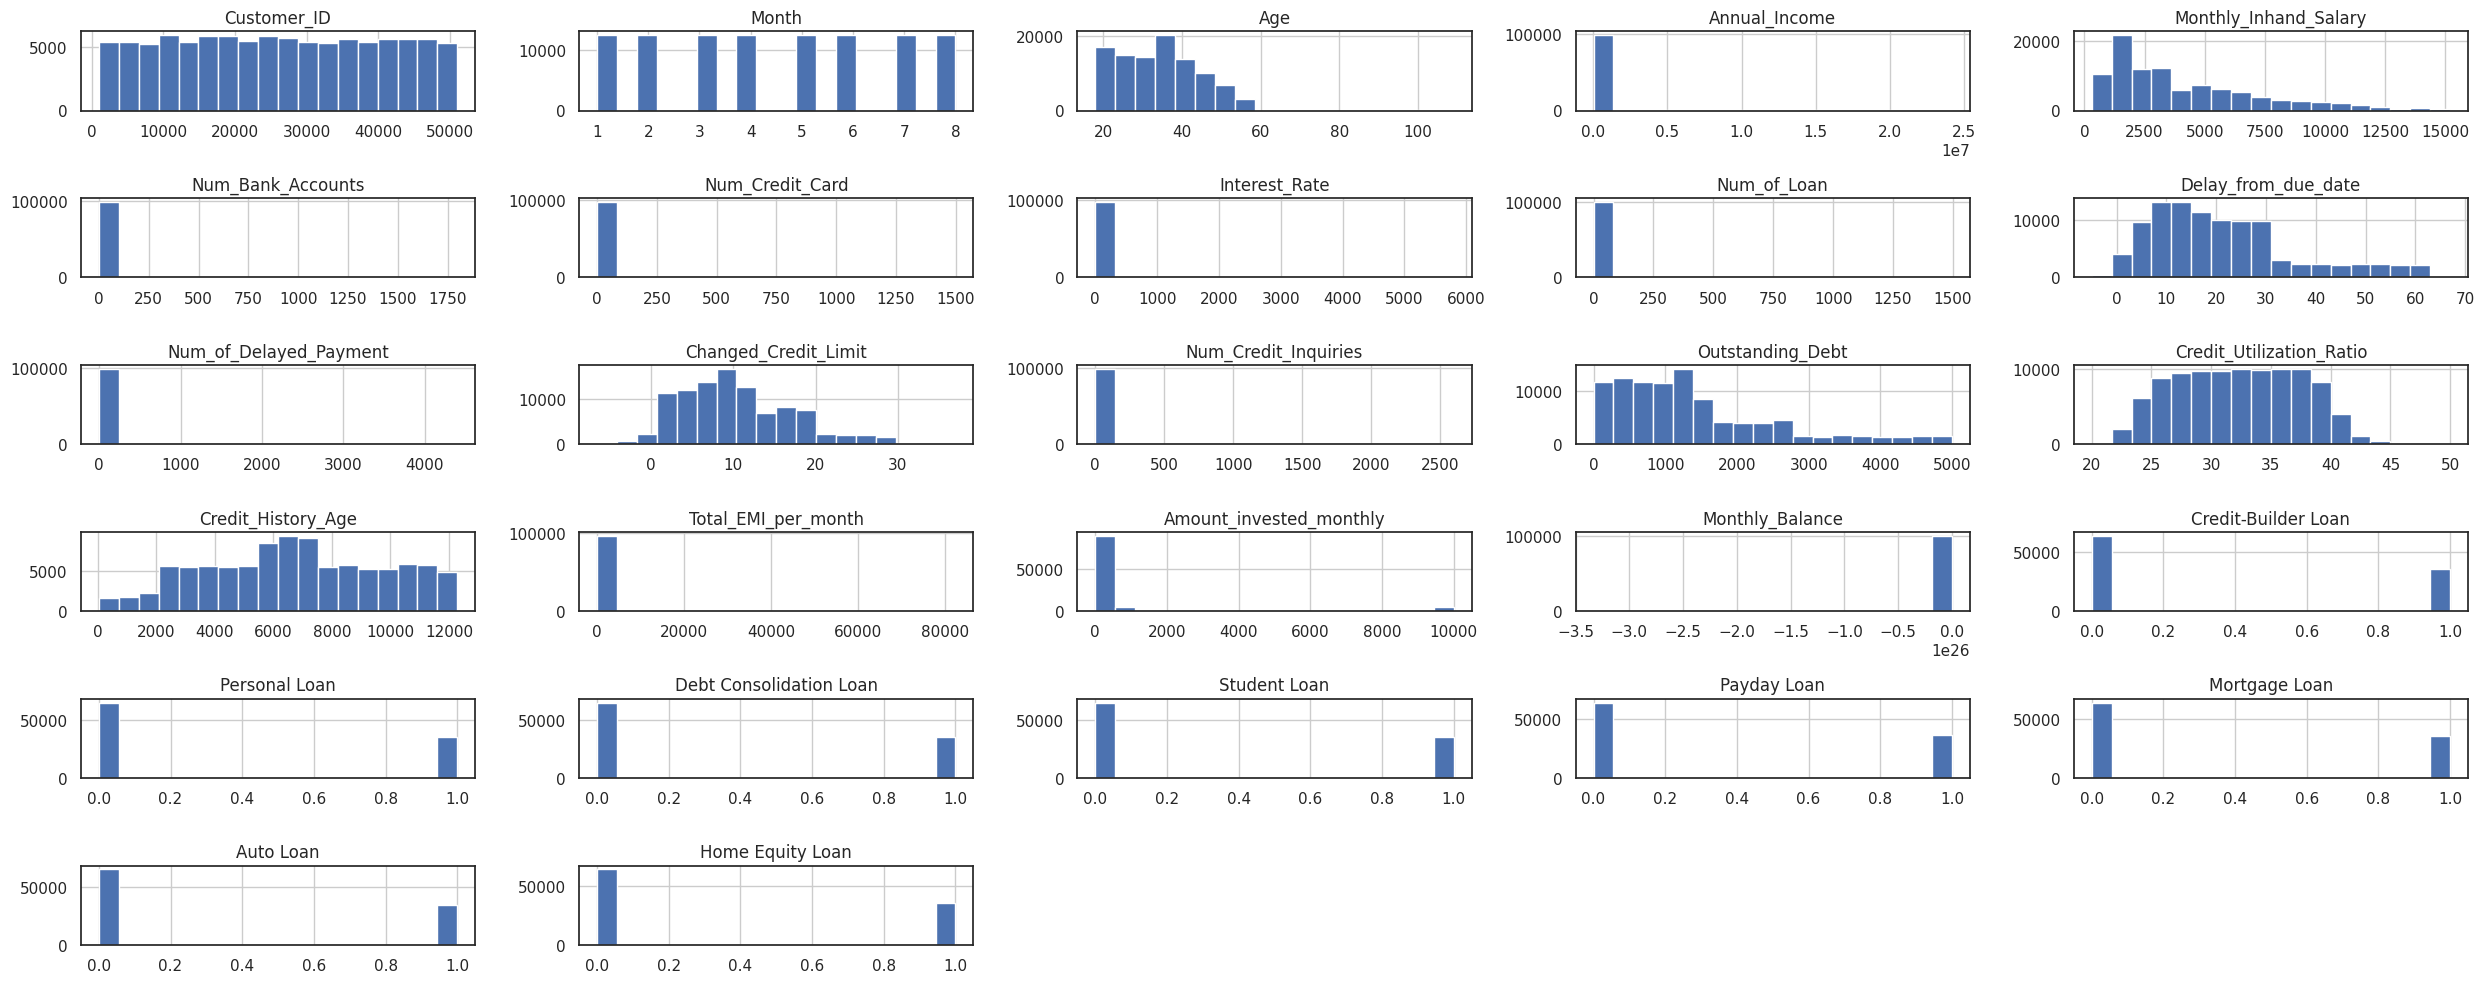

In [ ]:
import matplotlib.pyplot as plt

data.hist(bins=18, figsize=(25, 10))
plt.tight_layout()
plt.show()

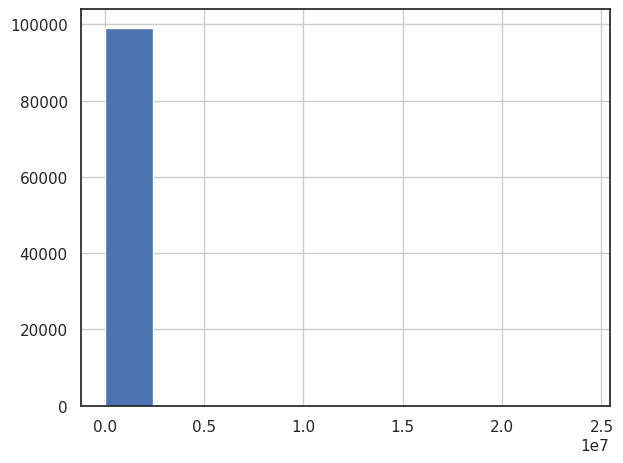

In [ ]:
import matplotlib.pyplot as plt

data['Annual_Income'].hist()
plt.tight_layout()
plt.show()

In [ ]:
num_columns = data.select_dtypes(["int64","float64"]).columns
print(num_columns)
print(len(num_columns))

Index(['Customer_ID', 'Month', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance', 'Credit-Builder Loan', 'Personal Loan',
       'Debt Consolidation Loan', 'Student Loan', 'Payday Loan',
       'Mortgage Loan', 'Auto Loan', 'Home Equity Loan'],
      dtype='object')
27


Com o uso de boxplots, é possível observar que a maior parte das colunas numéricas apresentam outliers, os quais precisaram ser tratados.

Customer_ID


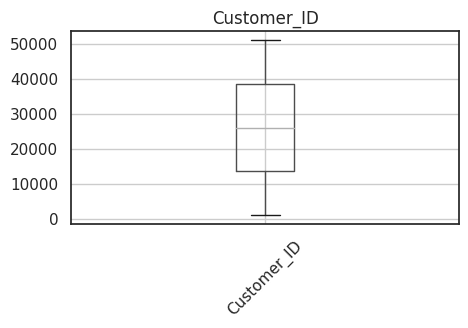

Month


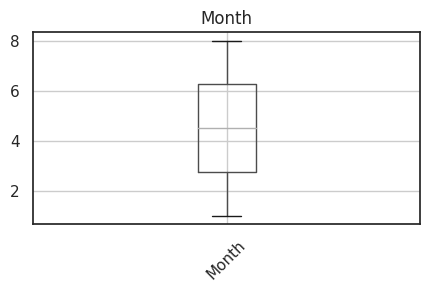

Age


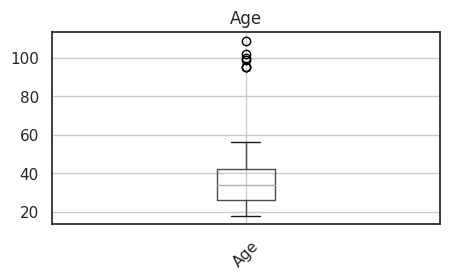

Annual_Income


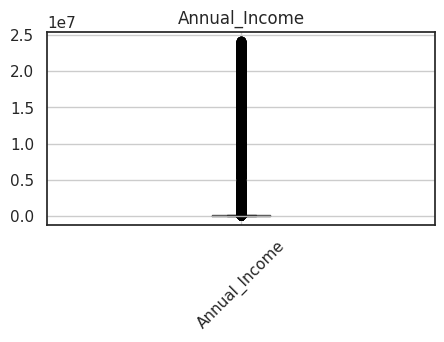

Monthly_Inhand_Salary


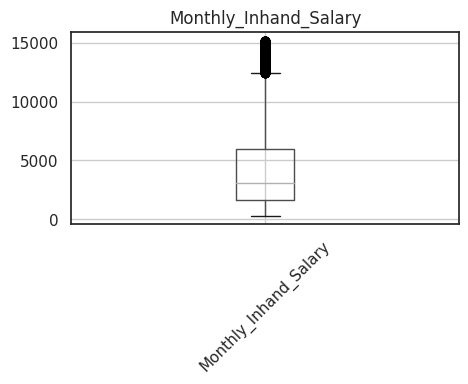

Num_Bank_Accounts


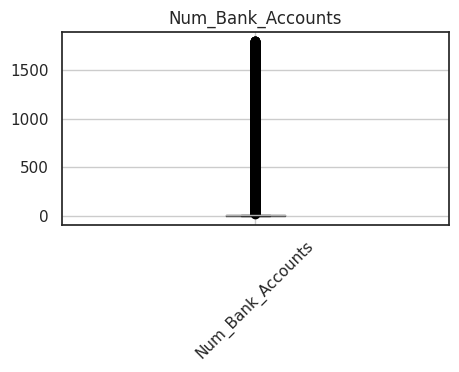

Num_Credit_Card


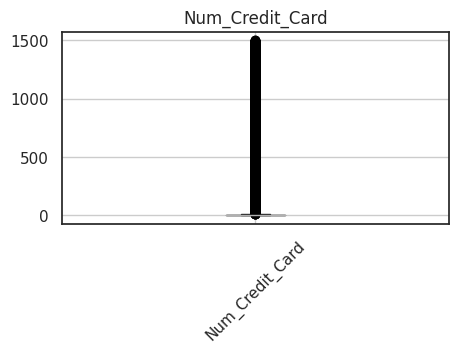

Interest_Rate


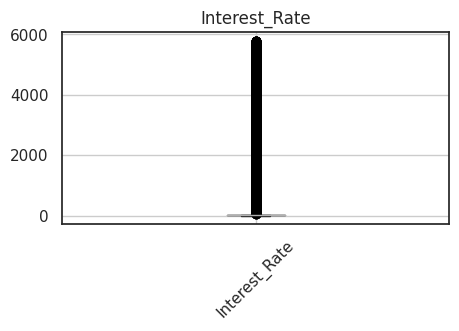

Num_of_Loan


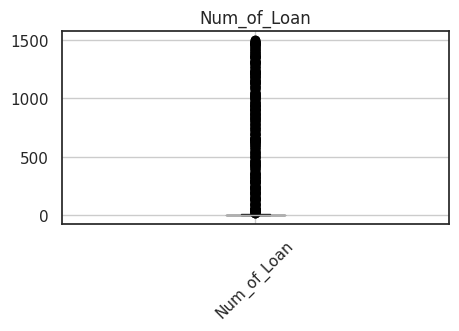

Delay_from_due_date


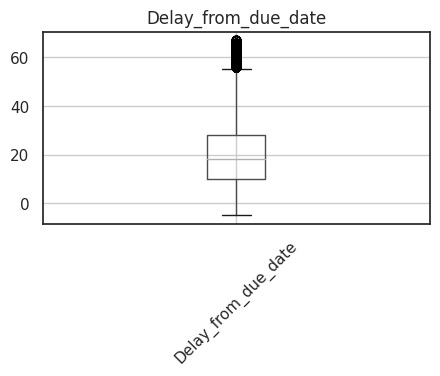

Num_of_Delayed_Payment


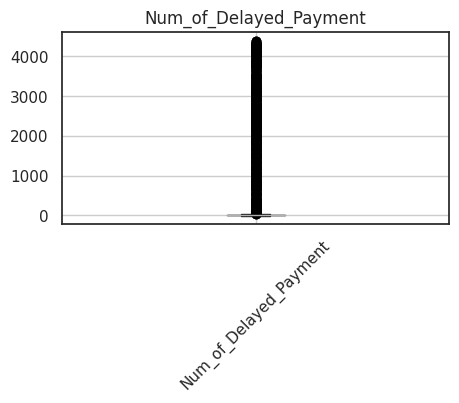

Changed_Credit_Limit


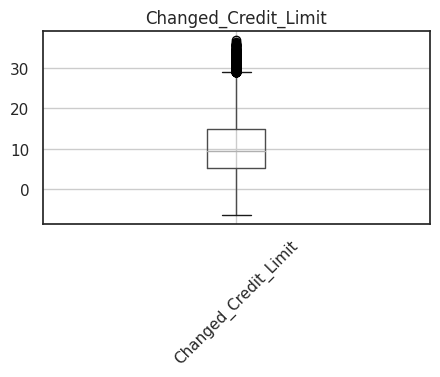

Num_Credit_Inquiries


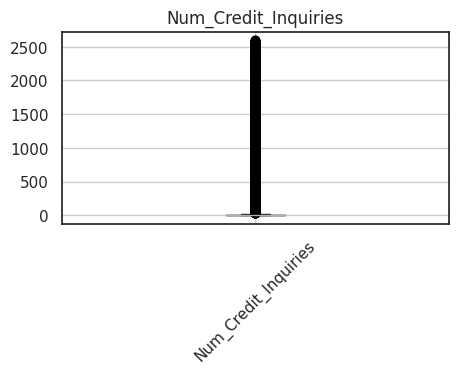

Outstanding_Debt


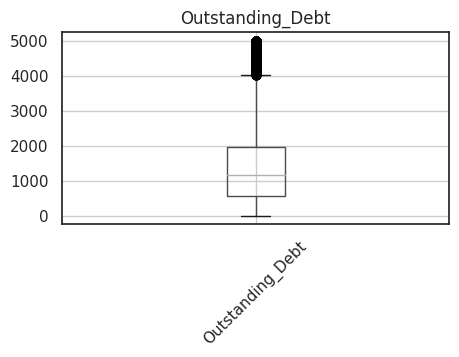

Credit_Utilization_Ratio


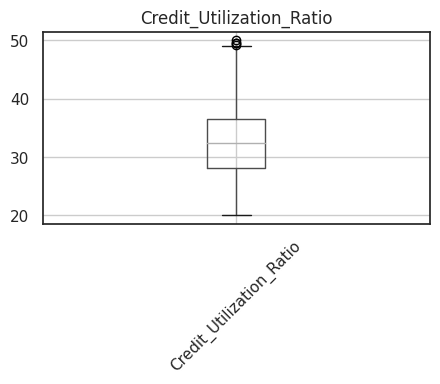

Credit_History_Age


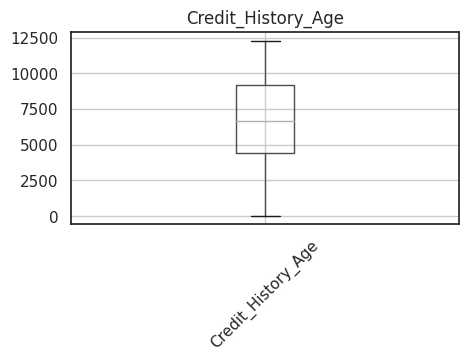

Total_EMI_per_month


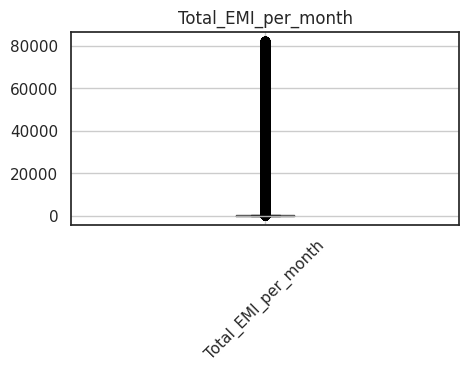

Amount_invested_monthly


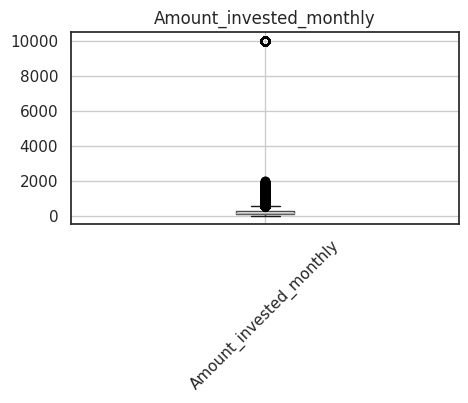

Monthly_Balance


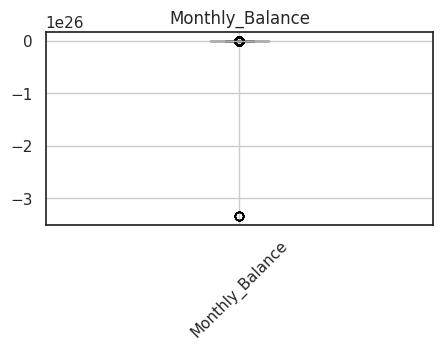

Credit-Builder Loan


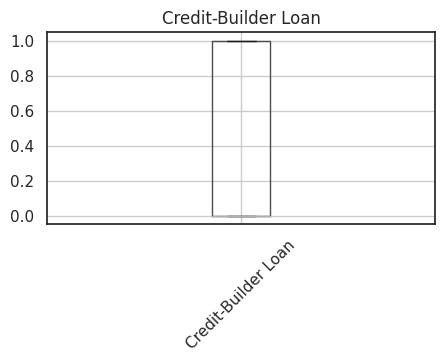

Personal Loan


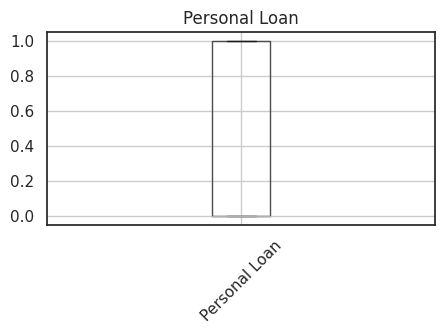

Debt Consolidation Loan


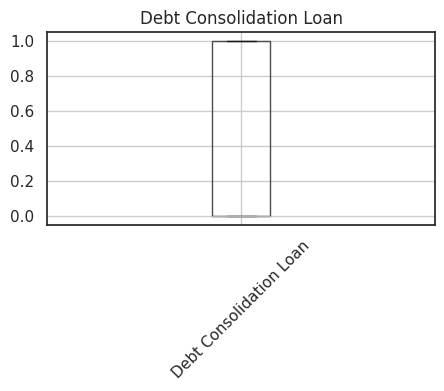

Student Loan


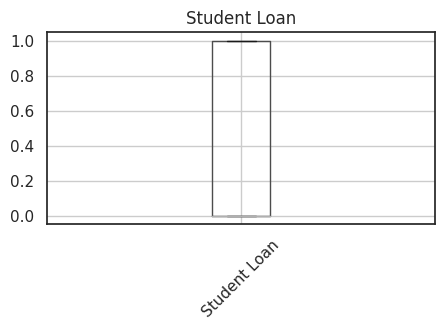

Payday Loan


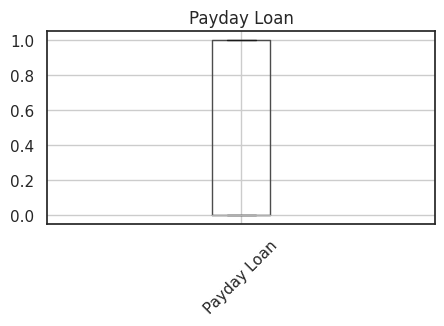

Mortgage Loan


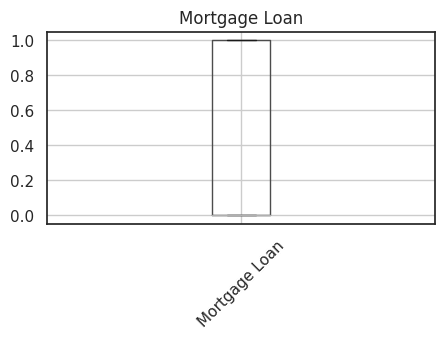

Auto Loan


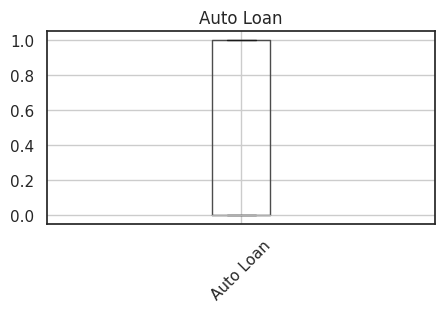

Home Equity Loan


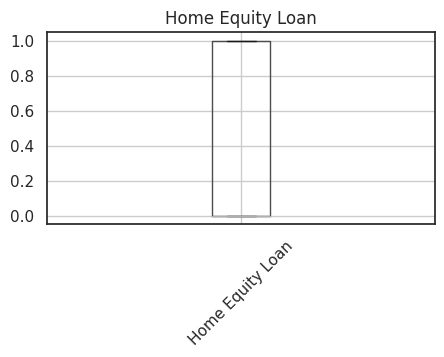

In [ ]:
for column in num_columns:
  plt.figure(figsize=(5, 2.5))  # Ajuste o tamanho conforme necessário
  print(column)
  data[[column]].boxplot()
  plt.xticks(rotation=45)  # Rotação dos nomes das colunas para melhor visualização
  plt.title(column)
  plt.show()

Para o tratamento dos outliers, foi utilizado o método de intervalo entre quartis para normalizar os valores, substituindo os outliers pelo limite superior ou inferior, dependendo do valor analizado.

Não foi possível o tratamento na forma de remoção dos outliers pois estão presentes na grande maioria das tuplas analisadas.

In [ ]:
for column in num_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    data[column] = data[column].apply(lambda x: min(max(x, lower), upper))

Customer_ID


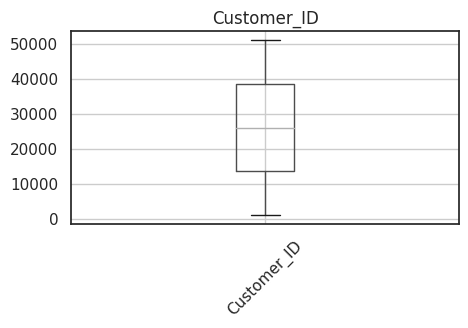

Month


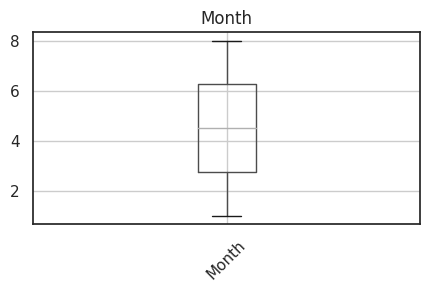

Age


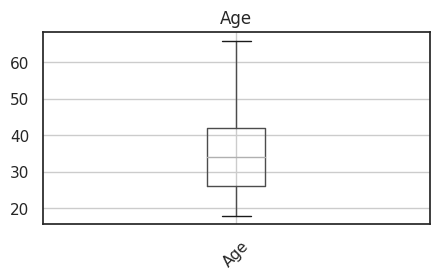

Annual_Income


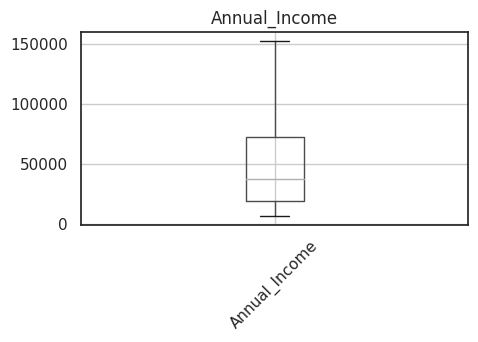

Monthly_Inhand_Salary


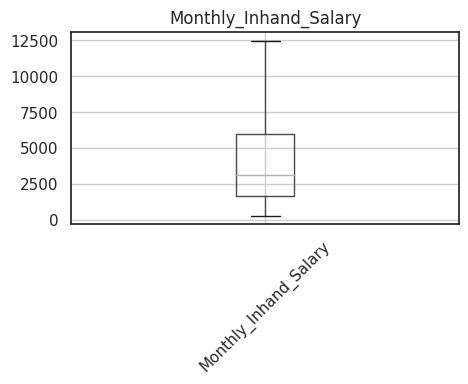

Num_Bank_Accounts


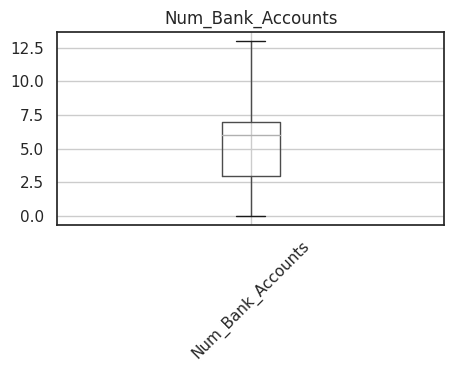

Num_Credit_Card


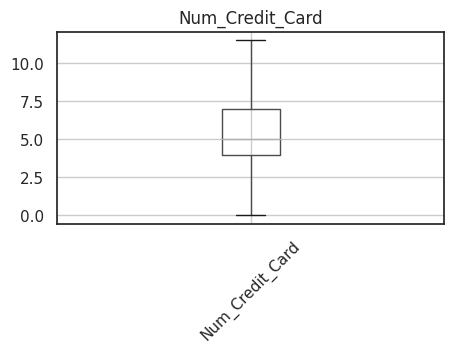

Interest_Rate


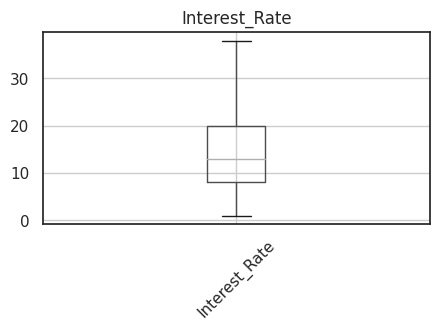

Num_of_Loan


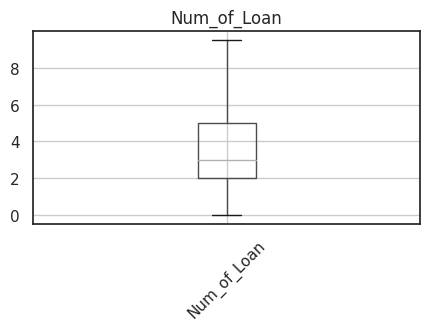

Delay_from_due_date


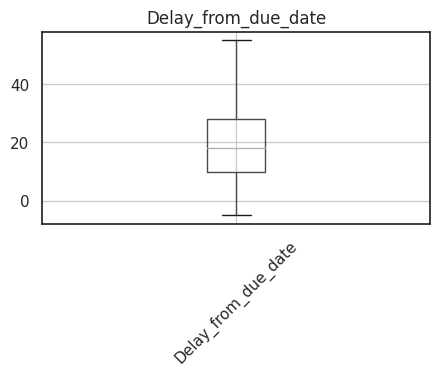

Num_of_Delayed_Payment


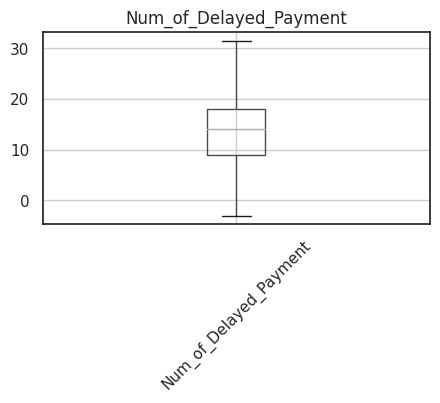

Changed_Credit_Limit


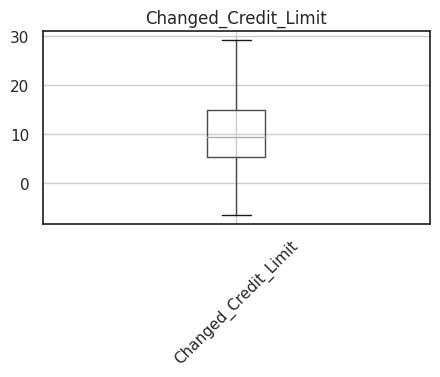

Num_Credit_Inquiries


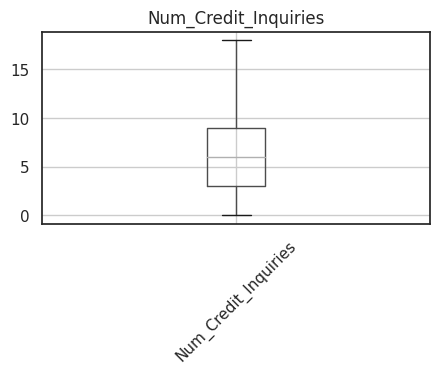

Outstanding_Debt


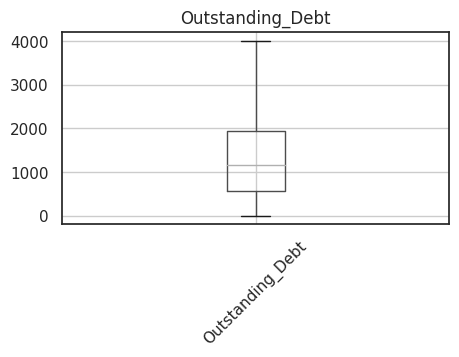

Credit_Utilization_Ratio


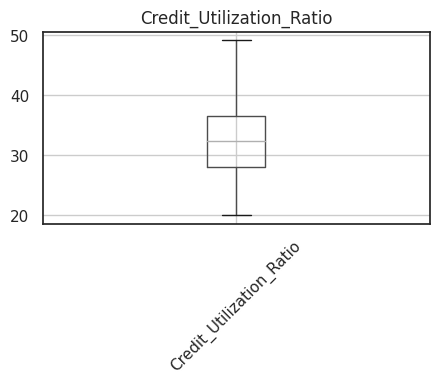

Credit_History_Age


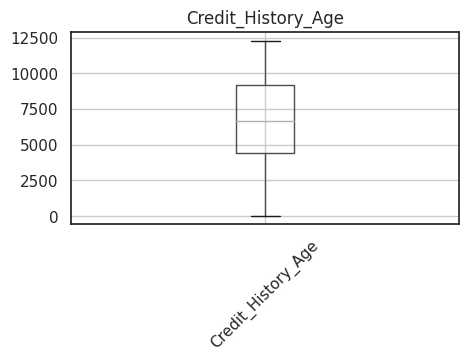

Total_EMI_per_month


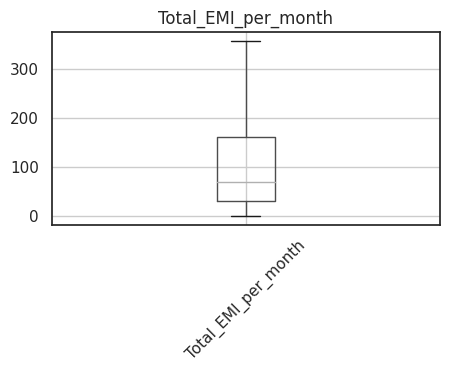

Amount_invested_monthly


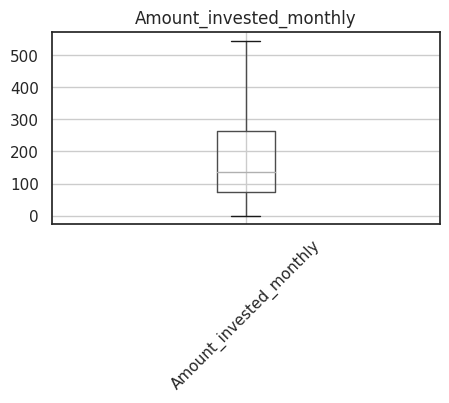

Monthly_Balance


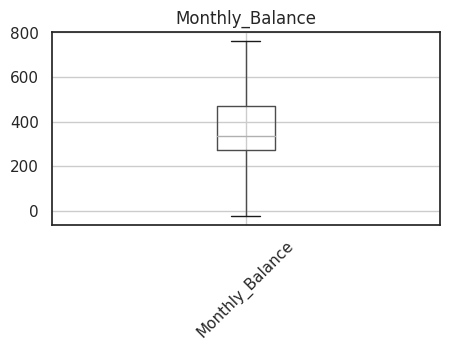

Credit-Builder Loan


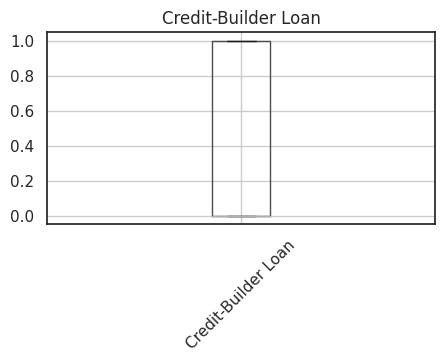

Personal Loan


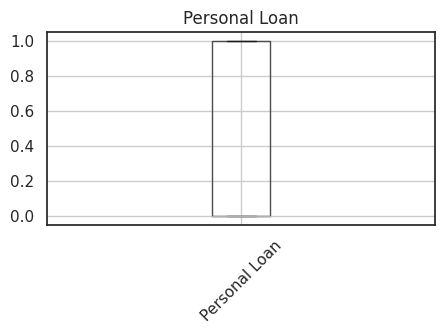

Debt Consolidation Loan


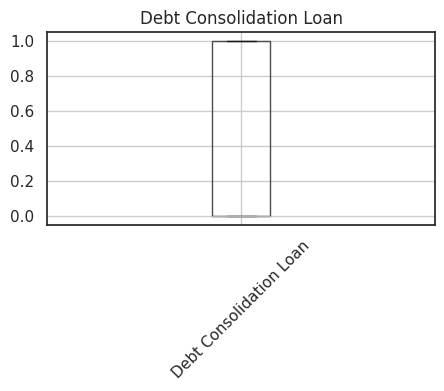

Student Loan


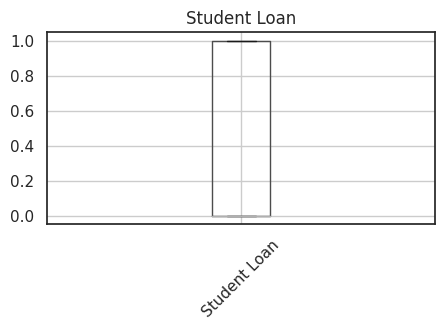

Payday Loan


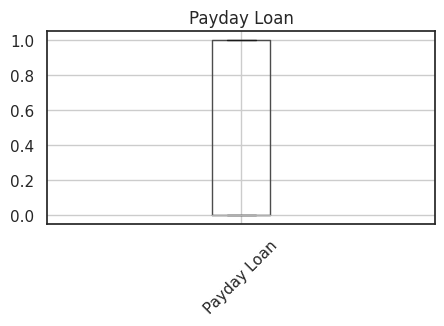

Mortgage Loan


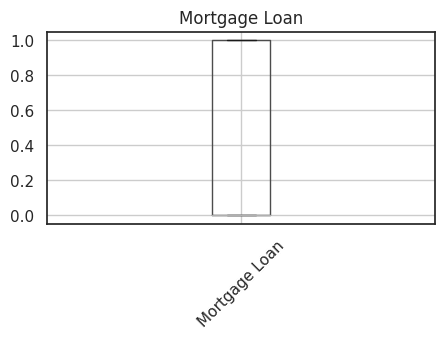

Auto Loan


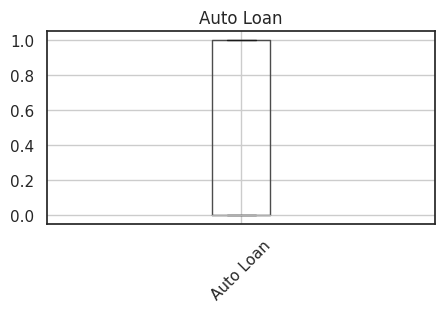

Home Equity Loan


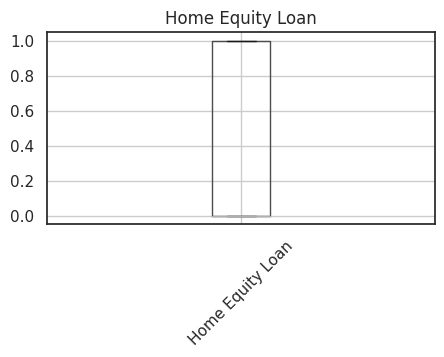

In [ ]:
for column in num_columns:
  plt.figure(figsize=(5, 2.5))  # Ajuste o tamanho conforme necessário
  print(column)
  data[[column]].boxplot()
  plt.xticks(rotation=45)  # Rotação dos nomes das colunas para melhor visualização
  plt.title(column)
  plt.show()

Depois, foram tratados os atributos categóricos.

In [ ]:
cat_columns = data.select_dtypes(include="object").columns
print(cat_columns)
print(len(cat_columns))

Index(['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour', 'Credit_Score'],
      dtype='object')
5


A coluna "Credit_Score" foi removida para o processo de treino e classificação.

In [ ]:
cat_columns = cat_columns.drop(['Credit_Score'])
for column in cat_columns:
  n = data[column].nunique()
  print(column+': '+str(n))

Occupation: 15
Credit_Mix: 3
Payment_of_Min_Amount: 2
Payment_Behaviour: 6


In [ ]:
for column in cat_columns:
  n = data[column].value_counts()
  print(n)

Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: Occupation, dtype: int64
Standard    45848
Good        30384
Bad         23768
Name: Credit_Mix, dtype: int64
Yes    52326
No     47674
Name: Payment_of_Min_Amount, dtype: int64
Low_spent_Small_value_payments      27767
High_spent_Medium_value_payments    19366
High_spent_Large_value_payments     15348
Low_spent_Medium_value_payments     14621
High_spent_Small_value_payments     11980
Low_spent_Large_value_payments      10918
Name: Payment_Behaviour, dtype: int64


A coluna "Occupation" foi removida por haver variância demais para transformar os valores em diferentes atributos.

In [ ]:
data = data.drop(['Occupation'],axis=1)
data = pd.get_dummies(data, columns=['Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour'])
data.columns

Index(['Customer_ID', 'Month', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance', 'Credit_Score', 'Credit-Builder Loan',
       'Personal Loan', 'Debt Consolidation Loan', 'Student Loan',
       'Payday Loan', 'Mortgage Loan', 'Auto Loan', 'Home Equity Loan',
       'Credit_Mix_Bad', 'Credit_Mix_Good', 'Credit_Mix_Standard',
       'Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_Yes',
       'Payment_Behaviour_High_spent_Large_value_payments',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payment_Behaviour_Low_spent_Large_value_payments',
       'Payment_Behaviour_Lo

Os atributos categóricos restantes serão divididos em colunas correspondentes aos valores assumidos.

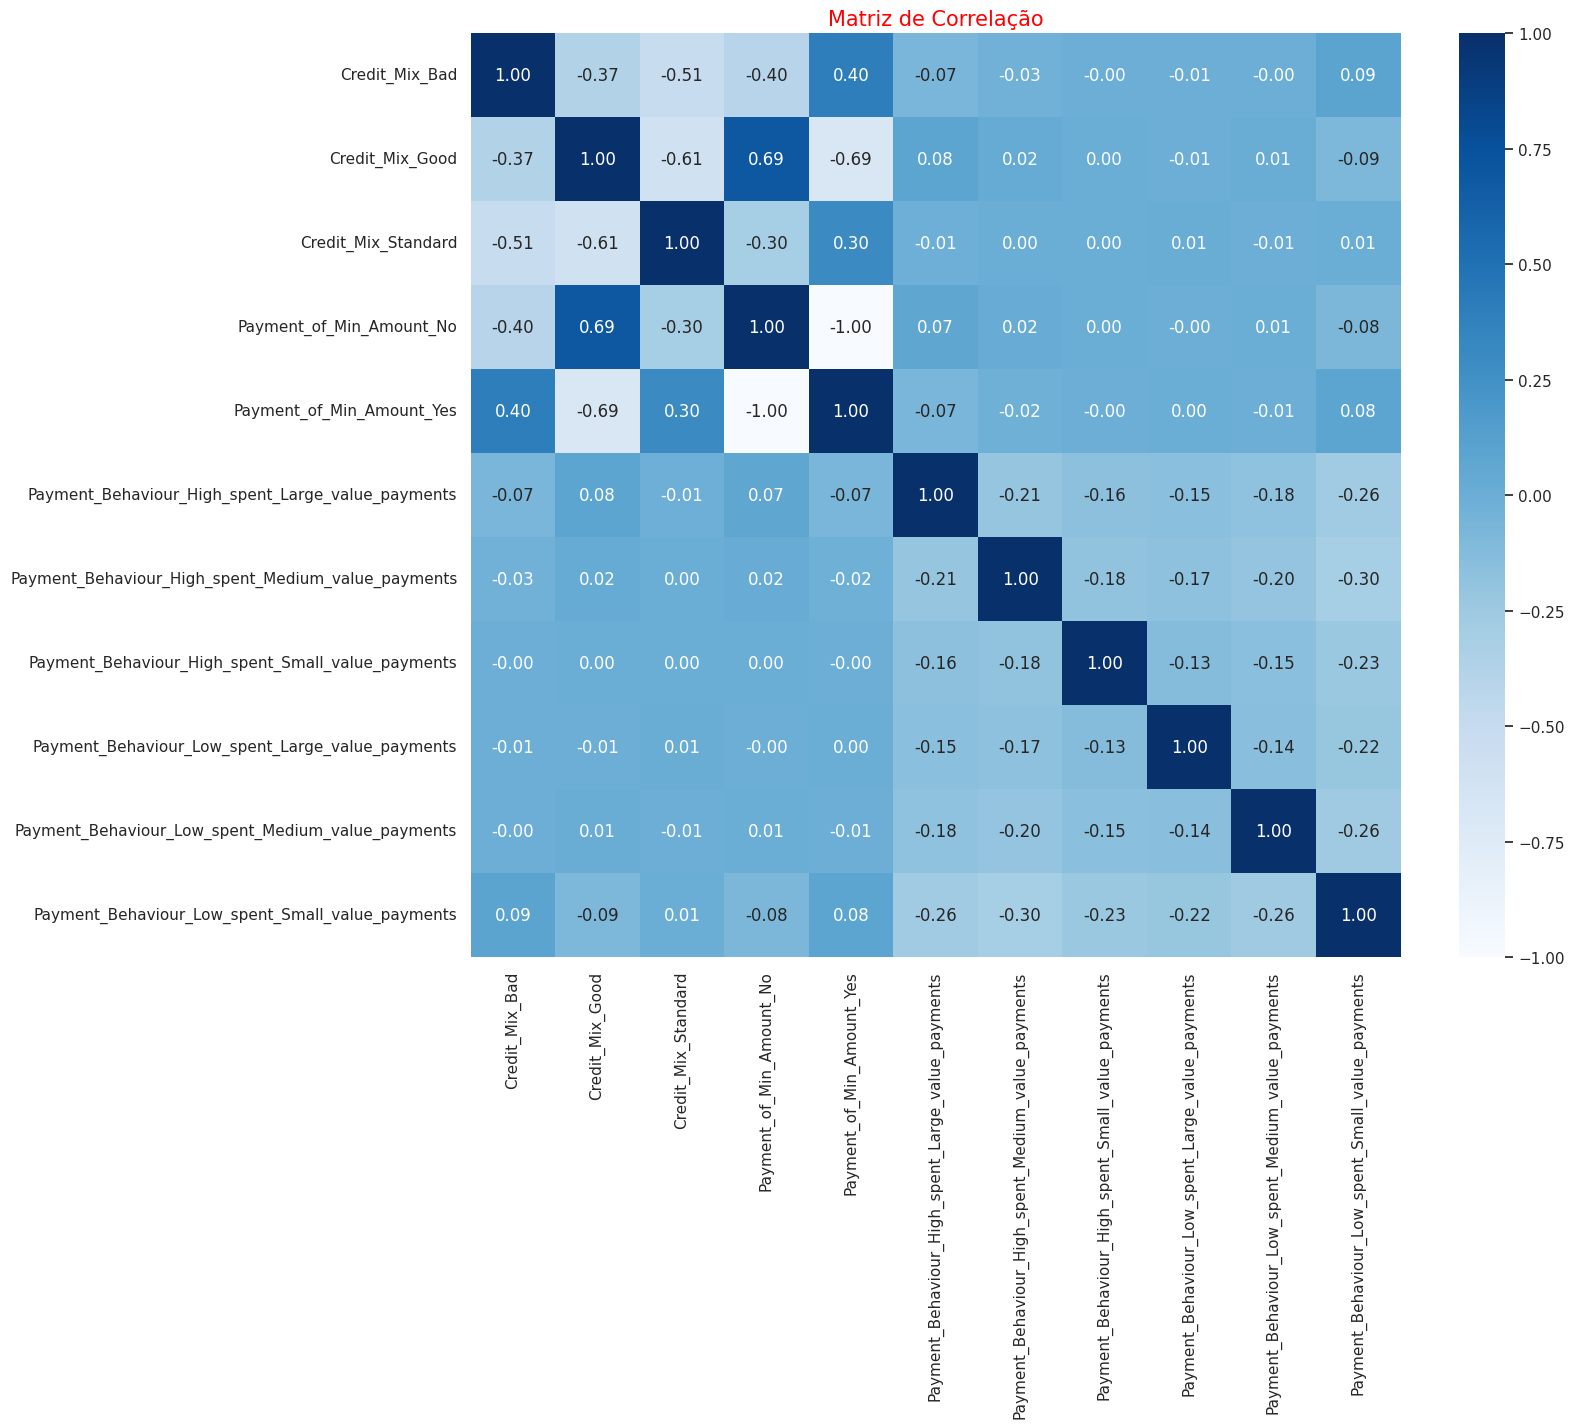

In [ ]:
columns = ['Credit_Mix_Bad',
                                          'Credit_Mix_Good',
                                      'Credit_Mix_Standard',
                                 'Payment_of_Min_Amount_No',
                                'Payment_of_Min_Amount_Yes',
        'Payment_Behaviour_High_spent_Large_value_payments',
       'Payment_Behaviour_High_spent_Medium_value_payments',
        'Payment_Behaviour_High_spent_Small_value_payments',
         'Payment_Behaviour_Low_spent_Large_value_payments',
        'Payment_Behaviour_Low_spent_Medium_value_payments',
         'Payment_Behaviour_Low_spent_Small_value_payments']

#Matriz de Correlação
df_corr=data[columns].corr()

plt.figure(figsize=(15,12))
plt.title("Matriz de Correlação", color="red",fontsize=15)
sns.heatmap(df_corr,annot=True,cmap="Blues",fmt=".2f")
sns.set(font_scale=1,style='white')
plt.show()

Foram removidas as colunas "Credit_Mix_Good" e "Payment_of_Min_Amount_No" pelo alto grau de correlação.

In [ ]:
data= data.drop(['Credit_Mix_Good', 'Payment_of_Min_Amount_No'], axis=1)

In [ ]:
data.head()

,Customer_ID,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Home Equity Loan,Credit_Mix_Bad,Credit_Mix_Standard,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,3392.0,1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,1.0,0,0,0,0,0,1,0,0,0
1,3392.0,2,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,-1.0,...,1.0,0,0,0,0,0,0,1,0,0
2,3392.0,3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,1.0,0,0,0,0,0,0,0,1,0
3,3392.0,4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,...,1.0,0,0,0,0,0,0,0,0,1
4,3392.0,5,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,...,1.0,0,0,0,0,1,0,0,0,0


# Combinação de Modelos

Com o tratamento de dados realizado, agora é possível aplicar os modelos de classificação desejados, que serão combinados posteriormente.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame and 'label_column' is the column containing your labels
label_encoder = LabelEncoder()

# Encode the labels and replace the original column
data['Credit_Score'] = label_encoder.fit_transform(data['Credit_Score'])


In [ ]:
data_standard = data[data['Credit_Score'] == 'Standard']
data_rest = data[data['Credit_Score'] != 'Standard']

# Divida o grupo 'Standard' em 3 grupos de tamanhos iguais
datas_standard = np.array_split(data_standard, 3)

# Agora você tem 3 DataFrames, cada um formado pelos dados do resto mais um dos três grupos do 'Standard'
data1 = pd.concat([data_rest, datas_standard[0]])
data2 = pd.concat([data_rest, datas_standard[1]])
data3 = pd.concat([data_rest, datas_standard[2]])

In [ ]:
X1 = data1.drop(columns=["Credit_Score"])
Y1 = data1["Credit_Score"]
X2 = data2.drop(columns=["Credit_Score"])
Y2 = data2["Credit_Score"]
X3 = data3.drop(columns=["Credit_Score"])
Y3 = data3["Credit_Score"]
Y1.drop(Y1.index[-1], inplace=True)
Y2.drop(Y2.index[-1], inplace=True)
X1.drop(Y1.index[-1], inplace=True)
X2.drop(Y2.index[-1], inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X1_normalized = scaler.fit_transform(X1)
X2_normalized = scaler.fit_transform(X2)
X3_normalized = scaler.fit_transform(X3)


In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_normalized, Y1,
                                            test_size = 0.2,
                                            random_state=42,
                                            stratify=Y1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_normalized, Y2,
                                            test_size = 0.2,
                                            random_state=42,
                                            stratify=Y2)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3_normalized, Y3,
                                            test_size = 0.2,
                                            random_state=42,
                                            stratify=Y3)



print(X1_train.shape)
print(X1_test.shape)
print(np.unique(y1_test))
print(X2_train.shape)
print(X2_test.shape)
print(np.unique(y2_test))
print(X3_train.shape)
print(X3_test.shape)
print(np.unique(y3_test))

(79999, 36)
(20000, 36)
[0 1 2]
(79999, 36)
(20000, 36)
[0 1 2]
(80000, 36)
(20000, 36)
[0 1 2]


In [ ]:
X = data.drop(columns=["Credit_Score"])
Y = data["Credit_Score"]

In [ ]:
from sklearn.metrics import balanced_accuracy_score

### Modelo 1 - KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

model1 = KNeighborsClassifier(n_neighbors=15)

model1.fit(X1_train, y1_train)

model1_pred = model1.predict(X1_test)

balanced_accuracy_score(y1_test, model1_pred)

0.659888943594737

### Modelo 2 - Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier(max_depth=30, min_samples_split=10, min_samples_leaf=5)

# Treinando o classificador
model2.fit(X2_train, y2_train)

# Fazendo previsões no conjunto de teste
model2_pred = model2.predict(X2_test)

balanced_accuracy_score(y2_test, model2_pred)

0.7042797156314741

### Modelo 3 - Multi-layer Perceptron


In [ ]:
from sklearn.neural_network import MLPClassifier

model3 = MLPClassifier(solver='adam', hidden_layer_sizes=(38, 30,20,10,9), random_state=1)

# Treinando o classificador
model3.fit(X3_train, y3_train)

# Fazendo previsões no conjunto de teste
model3_pred = model3.predict(X3_test)

balanced_accuracy_score(y3_test, model3_pred)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.7078246534008938

### Modelo 4 - Naive Bayes Multinomial

In [ ]:
from sklearn.linear_model import LogisticRegression

model4 = LogisticRegression()
model4.fit(X1_train, y1_train)

model4_pred = model4.predict(X1_test)

balanced_accuracy_score(y1_test, model4_pred)

0.6393571688434043

### Modelo 5 - Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model5 = RandomForestClassifier()
model5.fit(X2_train, y2_train)

model5_pred = model5.predict(X2_test)

balanced_accuracy_score(y2_test, model5_pred)


0.8186798109932218

### Modelo 6 - Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

model6 = AdaBoostClassifier()
model6.fit(X3_train, y3_train)

model6_pred = model6.predict(X3_test)

balanced_accuracy_score(y3_test, model6_pred)

0.6155233052028345

Foi utilizazdo o método VotingClassifier para a combinação dos métodos de classificação. Primeiramente utiliza-se o modo de votação "soft", utilizando as probabilidades dos modelos.

In [ ]:
from sklearn.ensemble import VotingClassifier

comite1 = VotingClassifier(estimators=[('knn', model1), ('dt', model2), ('mlp', model3), ('nbm', model4),('rf', model5),('ab', model6)], voting='soft')

comite1.fit(X1_train, y1_train)
comite1_pred = comite1.predict(X1_test)

print("Acurácia do primeiro comitê: ")
print(balanced_accuracy_score(y1_test, comite1_pred))

comite2 = VotingClassifier(estimators=[('knn', model1), ('dt', model2), ('mlp', model3), ('nbm', model4),('rf', model5),('ab', model6)], voting='soft')

comite2.fit(X2_train, y2_train)
comite2_pred = comite2.predict(X2_test)

print("Acurácia do segundo comitê: ")
print(balanced_accuracy_score(y2_test, comite2_pred))

comite3 = VotingClassifier(estimators=[('knn', model1), ('dt', model2), ('mlp', model3), ('nbm', model4),('rf', model5),('ab', model6)], voting='soft')

comite3.fit(X3_train, y3_train)
comite3_pred = comite3.predict(X3_test)

print("Acurácia do terceiro comitê: ")
print(balanced_accuracy_score(y3_test, comite3_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Acurácia do primeiro comitê: 
0.768111407379243


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Acurácia do segundo comitê: 
0.7696365823821343


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Acurácia do terceiro comitê: 
0.7699831111695383


Depois, os comitês são instanciados no modo "hard", de votação símples. Foram obtidos resultados minimamente piores que o modo que utiliza as probabilidades.

In [ ]:
comite1 = VotingClassifier(estimators=[('knn', model1), ('dt', model2), ('mlp', model3), ('nbm', model4),('rf', model5),('ab', model6)], voting='hard')

comite1.fit(X1_train, y1_train)
comite1_pred = comite1.predict(X1_test)

print("Acurácia do primeiro comitê: ")
print(balanced_accuracy_score(y1_test, comite1_pred))

comite2 = VotingClassifier(estimators=[('knn', model1), ('dt', model2), ('mlp', model3), ('nbm', model4),('rf', model5),('ab', model6)], voting='hard')

comite2.fit(X2_train, y2_train)
comite2_pred = comite2.predict(X2_test)

print("Acurácia do segundo comitê: ")
print(balanced_accuracy_score(y2_test, comite2_pred))

comite3 = VotingClassifier(estimators=[('knn', model1), ('dt', model2), ('mlp', model3), ('nbm', model4),('rf', model5),('ab', model6)], voting='hard')

comite3.fit(X3_train, y3_train)
comite3_pred = comite3.predict(X3_test)

print("Acurácia do terceiro comitê: ")
print(balanced_accuracy_score(y3_test, comite3_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Acurácia do primeiro comitê: 
0.7577065638953947


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Acurácia do segundo comitê: 
0.7579144479281202


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Acurácia do terceiro comitê: 
0.7581864408948773


Foi possível concluir que a combinação de métodos teve melhor desempenho que os métodos individuais de 5 dos 6 utilizados.